In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sf
import numpy as np 
from bevel import OrderedLogit as OrdLog
import lifelines as lf


***Биномиальная регрессия***

* Имя распределения - Распределение Бернулли
* разброс значений - (1...n)
* Параметры - p (вероятность каждого события), n (количество попыток)
* Функция связи - Биномиальный лОгит

In [8]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/76/titanik_full_data_1.csv', sep = '\t')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Из всего набора возьмём 4 столбца: Survived, Sex, Age, Pclass

Посмотрим на распределение выживших/погибших

Text(0.5, 1.0, 'Судьба пассажиров Титаника')

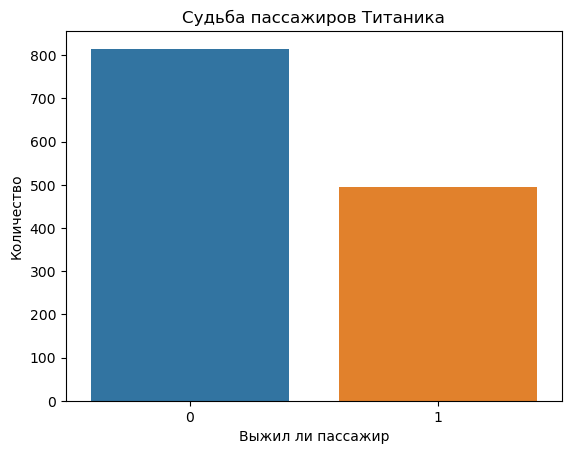

In [9]:
sns.countplot(x = 'Survived', data = titanic)
plt.xlabel('Выжил ли пассажир')
plt.ylabel('Количество')
plt.title('Судьба пассажиров Титаника')

Применим Логистическую регрессию. С() - категориальные переменные в формуле

In [10]:
logit_res = sf.glm('Survived ~ C(Pclass) + C(Sex) + Age', titanic, family = sm.families.Binomial()).fit()

In [11]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Thu, 06 Oct 2022   Deviance:                       796.42
Time:                        20:42:09   Pearson chi2:                 1.10e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4421
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

Intercept - шансы выжить (логарифмические) для женщины в первом классе, которой 0 лет

Все коэффициенты значимы! (P>|z|) < 0.05
* '-' в значении {Bi} указывает на то, что с ростом предиктора, падает вероятность (в этом случае выжить)
* значение указывает на силу предиктора.

__Мультиномиальная логистическая регрессия__
* Имя распределения - мультиномиальное
* разброс значений - (1...n)
* Параметры - p_1...p_n (вероятность каждого события), n (количество попыток)
* Функция связи - Мультиномиальный лОгит

Text(0.5, 1.0, 'Пассажирские классы')

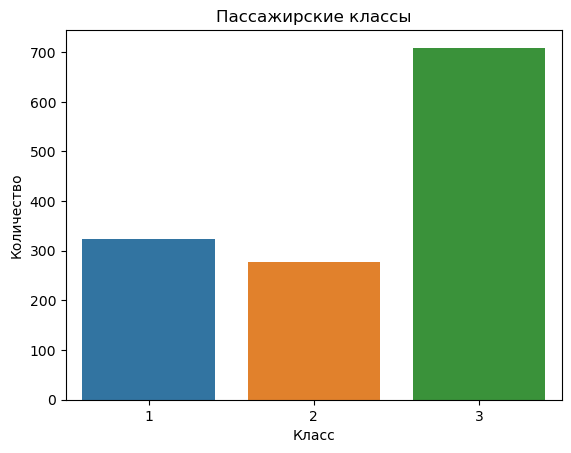

In [12]:
sns.countplot(x = 'Pclass', data = titanic)
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.title('Пассажирские классы')

In [13]:
multi_res = sf.mnlogit('Pclass ~ C(Sex) + Age', titanic).fit()
multi_res.summary()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:                  0.1028
Time:                        20:42:09   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

__Интерпретация__
- 1 класс - референт
- Мужчин больше во втором классе, а в третьем классе ещё больше
- Судя по тому, что интерцепт тоже больше (а в него входят и женщины), женщин тоже больше (бедных больше)

**Порядковая Регрессия**

- Распределение - кумулятивное пороговое
- Разброс значений - (1..n)
- Параметры - p1..pn (вероятность каждого события)
- Типичная функция связи - порядковый лОгит
- Ordinal regression отсутствует в statsmodels, устанавливаем с гита bevel


In [14]:
wines = pd.read_csv("https://vk.com/doc30920861_565726054?hash=e8efaf5ed2a5bd1ac4&dl=531fdb52320734f51b",sep = ";")

In [16]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


*Распределение рейтингов (переменная quality)*

Text(0.5, 1.0, 'Рейтинг красных вин')

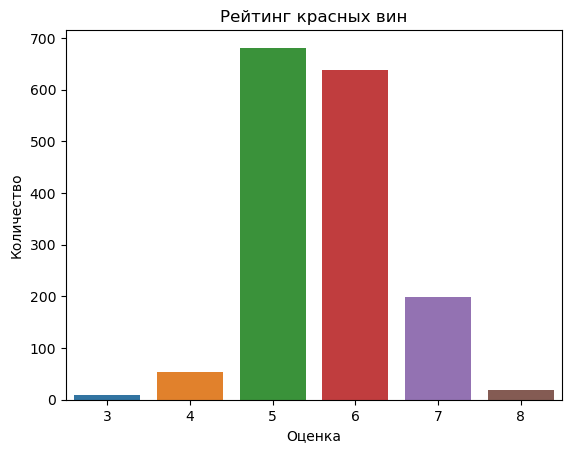

In [17]:
sns.countplot(x = 'quality', data=wines)
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('Рейтинг красных вин')

*bevel не поддерживает формулы, нужно выделить ЗП и НП в отдельные переменные*

In [20]:
Y = wines.quality
X = wines.drop('quality', axis = 1)

Строим модель (здесь сначала идут НП, затем ЗП)

In [21]:
ol = OrdLog()
ol.fit(X,Y)

In [22]:
ol.print_summary()


n=1599
                         beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                            
fixed acidity          0.1284    0.0823 0.1188     -0.0329      0.2898     
volatile acidity      -3.3957    0.4031 0.0000     -4.1857     -2.6058  ***
citric acid           -0.8022    0.4622 0.0827     -1.7081      0.1038    .
residual sugar         0.0878    0.0480 0.0670     -0.0062      0.1818    .
chlorides             -5.1416    1.3595 0.0002     -7.8062     -2.4770  ***
free sulfur dioxide    0.0137    0.0068 0.0444      0.0003      0.0270    *
total sulfur dioxide  -0.0111    0.0024 0.0000     -0.0158     -0.0065  ***
density              -76.5142   68.3654 0.2631   -210.5080     57.4795     
pH                    -0.8469    0.6009 0.1587     -2.0246      0.3308     
sulphates              2.9016    0.3675 0.0000      2.1814      3.6218  ***
alcohol                0.8308    0.0852 0.0000      0.6637      0.9978  ***
---
S

Somers' D == R^2 только для порядковых моделей. (-1,1) - как и корреляция.

In [23]:
credit = pd.read_csv('https://stepik.org/media/attachments/course/76/credit_card__1_.csv')

In [24]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


- active - число активных счетов
- age - возраст
- income - годовой доход в десятках тысяч
- expenditure - месячный расход средств кредитной карты
- owner - владеет ли пользователь собственным домом или нет
- selfemp - самозанят или нет?

Посмотрим распределение количества активных счетов:

Text(0.5, 1.0, 'Количество активных счетов')

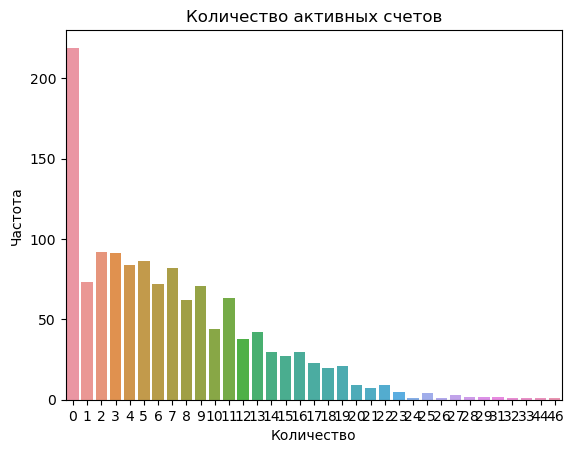

In [25]:
sns.countplot(x = 'active', data = credit)
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.title('Количество активных счетов')

Применим статистику Пуассона:

In [27]:
pois = sf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)', \
              family = sm.families.Poisson(), data = credit).fit()
pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5614.4
Date:                Thu, 06 Oct 2022   Deviance:                       7142.4
Time:                        21:48:36   Pearson chi2:                 6.89e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3903
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4000      0.037     37.440      0.000       1.327       1.473
C(owner)[T.yes]       0.4033      0.023     17.409      0.000       0.358       0.449
C(selfemp)[T.yes]     0.0141      0.040      0.355      0.723      -0.064       0.092
age                   0.0062      0.001      5.648      0.000       0.004       0.008
income                0.0361      0.006      5.752      0.000       0.024       0.048
expenditure        2.925e-05   3.75e-05      0.779      0.436   -4.43e-05       0.000
=====================================================================================
"""

Количество кредитных карт растёт в зависимости от:
- дохода
- возраста
- владения собственным домом

**Проблемы сверхдисперсии.**
Как подсчитать сверхдисперсию:

In [29]:
pois.pearson_chi2/pois.df_resid

5.249939996924354

Для модели Пуассона это значение должно быть близко к 1. Нужно другое распределение, т.к. дисперсия превышает ср. значение в 5 раз, а в статистике пуассона они должны быть равны (D[Y] == M[Y] == lambda)

**Отрицательное Биномиальное Распределение (Распределение Паскаля)**
- разброс: (0;$\infty$)
- параметры: **$\mu$**, **$\sigma/\alpha$**
- Функция Связи - $log$

Когда строим модель, обращаем внимание на аргумент $\alpha$ - это параметр дисперсии. От него зависит сходимость результатов, поэтому в случае ошибок рекомендуется ставить его в диапазоне от 0.1 до 2.

In [30]:
Pascal = sf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)', data = credit, \
                family = sm.families.NegativeBinomial(alpha=0.15)).fit()
Pascal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4429.3
Date:                Thu, 06 Oct 2022   Deviance:                       3940.9
Time:                        22:06:13   Pearson chi2:                 3.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2157
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3690      0.054     25.206      0.000       1.263       1.475
C(owner)[T.yes]       0.3984      0.033     11.996      0.000       0.333       0.463
C(selfemp)[T.yes]     0.0055      0.059      0.094      0.925      -0.110       0.121
age                   0.0069      0.002      4.263      0.000       0.004       0.010
income                0.0393      0.010      4.099      0.000       0.021       0.058
expenditure        2.445e-05   5.63e-05      0.434      0.664   -8.59e-05       0.000
=====================================================================================
"""

Интерпретация результатов очень похожа. Сверхдисперсия чек:

In [31]:
Pascal.pearson_chi2/Pascal.df_resid

2.619678072487026

Лучше, однако не достаточно. Сравним модели с помощью информационного критерия _Акаике (AIC)_
- Его абсолютное значение ничего не значит, полезен только для сравнения моделей
- Чем он ниже, тем лучше модель

Сравнение допустимо только при условии идентичности ЗП и НП

In [34]:
print(pois.aic)
print(Pascal.aic)

11240.817775454601
8870.632884339046


***ZERO INFLATED*** Model
- добавляем к предыдущей модели параметр $\pi$ - вероятность принадлежности нуля одному из двух процессов

API не позволяет пользоваться формулой, данные необходимо подготовить

In [35]:
credit.owner = np.where(credit.owner == 'yes', 1,0)
credit.selfemp = np.where(credit.selfemp == 'yes', 1,0) #меняем данные на 0 и 1, чтоб не было ошибки

Y = credit.active #ЗП
X = credit.loc[:, ['owner', 'selfemp', 'age', 'income', 'expenditure']] #НП
X = sm.add_constant(X) #добавляем константу, чтобы в модели был intercept

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
zeroinf = sm.ZeroInflatedPoisson(Y,X).fit(maxiter = 100, method = 'ncg')
zeroinf.summary()

/home/sex_beast/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 3.899929
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 9
         Hessian evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                  active   No. Observations:                 1319
Model:             ZeroInflatedPoisson   Df Residuals:                     1313
Method:                            MLE   Df Model:                            5
Date:                 Thu, 06 Oct 2022   Pseudo R-squ.:                -0.05893
Time:                         22:17:44   Log-Likelihood:                -5144.0
converged:                        True   LL-Null:                       -4857.8
Covariance Type:             nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     0.0999      0.055      1.812      0.070      -0.008       0.208
const             1.7967      0.037     48.172      0.000       1.724       1.870
owner             0.0017      0.023      0.073      0.942      -0.043       0.046
selfemp           0.0008      0.039      0.022      0.983      -0.075       0.077
age               0.0093      0.001      8.656      0.000       0.007       0.011
income            0.0019      0.007      0.280      0.779      -0.011       0.015
expenditure       0.0001   3.81e-05      2.691      0.007    2.79e-05       0.000
=================================================================================
"""

Вывод: Резко изменилась интерпретация: значим только возраст и стали значимыми расходы. Ещё появился коэф inflate - отвечающий за компенсацию лишних нулей.

Сравним модели с помощью AIC:

In [37]:
print(pois.aic)
print(Pascal.aic)
print(zeroinf.aic)

11240.817775454601
8870.632884339046
10300.01303290444


Теперь вернёмся к распределению Паскаля и пофиксим проблему нулей:

In [40]:
zeroinfPasc = sm.ZeroInflatedNegativeBinomialP(Y,X).fit(maxiter = 100, method = 'ncg')
zeroinfPasc.summary()

Optimization terminated successfully.
         Current function value: 3.055914
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 13
         Hessian evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                            active   No. Observations:                 1319
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     1313
Method:                                      MLE   Df Model:                            5
Date:                           Thu, 06 Oct 2022   Pseudo R-squ.:                -0.03018
Time:                                   22:23:05   Log-Likelihood:                -4030.7
converged:                                  True   LL-Null:                       -3912.7
Covariance Type:                       nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.5152      0.058     -8.820      0.000      -0.630      -0.401
const             1.4543      0.087     16.765      0.000       1.284       1.624
owner             0.3590      0.050      7.112      0.000       0.260       0.458
selfemp           0.0029      0.090      0.032      0.974      -0.173       0.178
age               0.0097      0.003      3.757      0.000       0.005       0.015
income            0.0352      0.016      2.234      0.026       0.004       0.066
expenditure    5.109e-05   9.08e-05      0.563      0.573      -0.000       0.000
alpha             0.4517      0.032     14.330      0.000       0.390       0.514
=================================================================================
"""

Интерпретация похожа на изначальную, добавился параметр альфа, который оценивает избыток дисперсии

Сравним:

In [41]:
print(pois.aic)
print(Pascal.aic)
print(zeroinf.aic)
print(zeroinfPasc.aic)

11240.817775454601
8870.632884339046
10300.01303290444
8073.499826668628


$$[We\ have\ a\ winner!]$$

**Анализ Выживаемости.** **Модель ускорения времени неудачи**

- Распределение Вейбулла (одно из, можно Гомпертца)
- Разброс значений - (0;$\infty$)
- Параметры - $\alpha$ (дисперсия), $\gamma$ (форма)
- Функция связи - $\log$

Данные оттока клиентов (IBM, telco)

In [43]:
churn = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Проанализируем следующие предикторы
- Churn - ушёл клиент или нет
- tenure - сколько месяцев проработал
- Senior Citizen - клиент пожилой или нет
- Dependents - есть ли кто на иждивении
- Paperless billing - бесчековая оплата

Text(0.5, 1.0, 'Судьба клиентов компании')

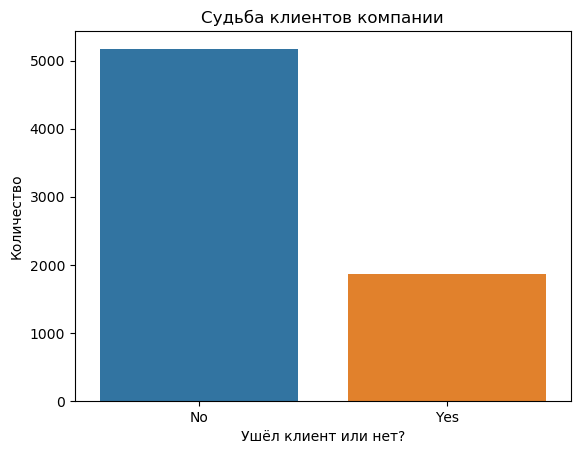

In [48]:
sns.countplot(x = 'Churn', data = churn)
plt.xlabel('Ушёл клиент или нет?')
plt.ylabel('Количество')
plt.title('Судьба клиентов компании')

Распределение времени, проведённого с компанией

Text(0.5, 1.0, 'Сколько времени клиенты провели с компанией')

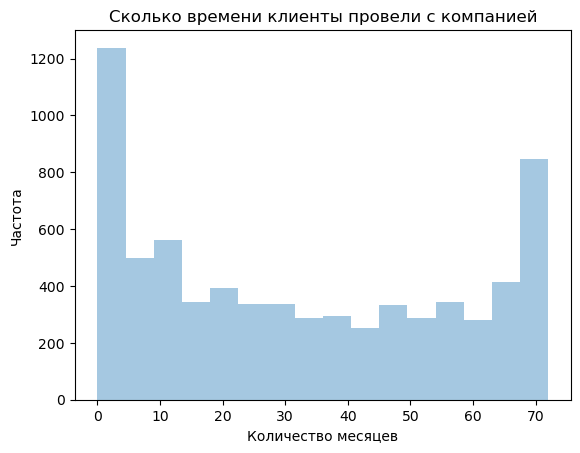

In [49]:
sns.distplot(churn.tenure, kde = False)
plt.xlabel('Количество месяцев')
plt.ylabel('Частота')
plt.title('Сколько времени клиенты провели с компанией')

Заметны два распределения, сложенные в одно. Разделим.
Подготовим данные:


In [51]:
churn.tenure = churn.tenure + 0.001 # чтобы не было нулевых месяцев
churn.Churn = np.where(churn.Churn == 'Yes', 1, 0) #перекодируем в 0 и 1
churn.SeniorCitizen = np.where(churn.SeniorCitizen == 1, 'Yes', 'No') #наоборот

Строим. Нужно указать данные, колонку со временем, колонку с событием и, опционально, формулу.

In [56]:
surv = lf.WeibullAFTFitter()

surv.fit(df = churn, duration_col = 'tenure', event_col = 'Churn', \
         formula = 'C(SeniorCitizen) + C(Dependents) + MonthlyCharges + C(PaperlessBilling)')

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [57]:
surv.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1869
           log-likelihood = -10355.96
         time fit was run = 2022-10-06 20:00:55 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                          
lambda_ Intercept                    5.84     344.19       0.12             5.61             6.08               272.31               435.03
        C(Dependents)[T.Yes]         1.21       3.34       0.10             1.02             1.40                 2.76                 4.05
        C(PaperlessBilling)[T.Yes]  -0.91       0.40       0.09            -1.08            -0.74                 0.34                 0.48
        C(SeniorCitizen)[T.Yes]     -0.38       0.69       0.09            -0.54            -0.21                 0.58                 0.81
        MonthlyCharges              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
rho_    Intercept                   -0.43       0.65       0.02            -0.47            -0.39                 0.63                 0.68

                                     cmp to      z      p   -log2(p)
param   covariate                                                   
lambda_ Intercept                      0.00  48.88 <0.005        inf
        C(Dependents)[T.Yes]           0.00  12.38 <0.005     114.48
        C(PaperlessBilling)[T.Yes]     0.00 -10.31 <0.005      80.37
        C(SeniorCitizen)[T.Yes]        0.00  -4.44 <0.005      16.75
        MonthlyCharges                 0.00  -0.85   0.39       1.35
rho_    Intercept                      0.00 -20.70 <0.005     313.93
---
Concordance = 0.62
AIC = 20723.91
log-likelihood ratio test = 441.19 on 4 df
-log2(p) of ll-ratio test = 310.46